# Imports

In [13]:
import keras #High level interface of TensorFlow
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import InputLayer
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers.convolutional import *
import numpy as np 
import matplotlib.pyplot as plt
import tensorflowjs as tfjs
from PIL import Image
from keras.optimizers import RMSprop

# Image preprocessing

In [14]:
train_path='../dataset2/train'
valid_path='../dataset2/valid'

In [15]:
batch_size = 16 #Every batch contains data from 16 different images 
#Data Augmentation
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid_datagen = ImageDataGenerator(
        rescale = 1./255
)
train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(200, 200),  
        batch_size=batch_size,)  
valid_set = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(200, 200),  
        batch_size=batch_size,)  


Found 1190 images belonging to 10 classes.
Found 464 images belonging to 10 classes.


# Creating a model

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200,200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #first block, frozen

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Flatten()) #Stream data to "nodes" of the ANN
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #Dropping out some data
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
__________

In [17]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Training

In [18]:
model.fit_generator(train_set,
                    steps_per_epoch = 1190//16, #1000/16 numbers of batches per epoch
                    epochs = 20,
                    validation_data = valid_set,
                    validation_steps = 464//16 )
                   
        
                 

Epoch 1/20
74/74 [==============================] - 98s 1s/step - loss: 2.0948 - acc: 0.3933 - val_loss: 2.0608 - val_acc: 0.2328
Epoch 2/20
74/74 [==============================] - 119s 2s/step - loss: 1.7208 - acc: 0.5098 - val_loss: 1.7878 - val_acc: 0.3448
Epoch 3/20
74/74 [==============================] - 116s 2s/step - loss: 1.4026 - acc: 0.5890 - val_loss: 1.5084 - val_acc: 0.4763
Epoch 4/20
74/74 [==============================] - 95s 1s/step - loss: 1.2692 - acc: 0.6269 - val_loss: 1.2462 - val_acc: 0.5905
Epoch 5/20
74/74 [==============================] - 95s 1s/step - loss: 1.1333 - acc: 0.6492 - val_loss: 1.2042 - val_acc: 0.6056
Epoch 6/20
74/74 [==============================] - 92s 1s/step - loss: 1.0031 - acc: 0.6757 - val_loss: 1.0382 - val_acc: 0.6293
Epoch 7/20
74/74 [==============================] - 93s 1s/step - loss: 0.9845 - acc: 0.6926 - val_loss: 1.0208 - val_acc: 0.6638
Epoch 8/20
74/74 [==============================] - 98s 1s/step - loss: 0.8688 - acc: 0.

In [19]:
model.save("Model/model_200x200.h5")
tfjs.converters.save_keras_model(model, './Model/model_js_200x200/model.json')
print("Saved")

Saved


# Testing

In [20]:
valid_set.class_indices

{'Faces': 0,
 'accordion': 1,
 'airplanes': 2,
 'butterfly': 3,
 'cougar_body': 4,
 'cougar_face': 5,
 'crab': 6,
 'crayfish': 7,
 'crocodile': 8,
 'soccer_ball': 9}

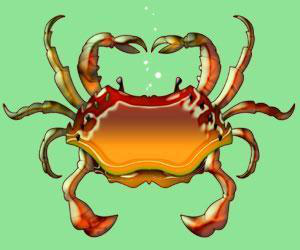

In [29]:
image = Image.open("PersonalTestSet/image_0003.jpg")
image

In [30]:
def preprocess_img(img,target_size):
    img = img.resize(target_size)
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    return img

In [31]:
preprocessed_image = preprocess_img(image,target_size=(200,200))

In [32]:
predictions = model.predict_proba(preprocessed_image)
predictions

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)